In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import string


In [2]:
#csv file reference to load
csv_path = "Resources/FastFoodRestaurants.csv"
#read/store into Pandas DF
fast_food_data = pd.read_csv(csv_path, encoding = 'utf-8')
fast_food_data.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [3]:
fast_food_data.info()
# result below means that this particular dataset has 10K restaurants which includes address details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     10000 non-null  object 
 1   city        10000 non-null  object 
 2   country     10000 non-null  object 
 3   keys        10000 non-null  object 
 4   latitude    10000 non-null  float64
 5   longitude   10000 non-null  float64
 6   name        10000 non-null  object 
 7   postalCode  10000 non-null  object 
 8   province    10000 non-null  object 
 9   websites    9535 non-null   object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [4]:
fast_food_data.count()

address       10000
city          10000
country       10000
keys          10000
latitude      10000
longitude     10000
name          10000
postalCode    10000
province      10000
websites       9535
dtype: int64

In [5]:
# remove rows with missing data
fast_food_data = fast_food_data.dropna(how="any")
fast_food_data.count()

address       9535
city          9535
country       9535
keys          9535
latitude      9535
longitude     9535
name          9535
postalCode    9535
province      9535
websites      9535
dtype: int64

In [6]:
fast_food_data.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [7]:
# drop keys and website columns because they're not needed
fast_food_data.drop('keys', axis=1, inplace=True)
fast_food_data.head()

,address,city,country,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [8]:
# drop website column
fast_food_data.drop('websites', axis=1, inplace=True)
fast_food_data.head()

,address,city,country,latitude,longitude,name,postalCode,province
0,324 Main St,Massena,US,44.92130,-74.89021,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,US,38.62736,-83.79141,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,US,44.95008,-74.84553,McDonald's,13662,NY
4,139 Columbus Rd,Athens,US,39.35155,-82.09728,OMG! Rotisserie,45701,OH


In [9]:
# drop country column
fast_food_data.drop('country', axis=1, inplace=True)
fast_food_data.head()

,address,city,latitude,longitude,name,postalCode,province
0,324 Main St,Massena,44.92130,-74.89021,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,39.53255,-83.44526,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,38.62736,-83.79141,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,44.95008,-74.84553,McDonald's,13662,NY
4,139 Columbus Rd,Athens,39.35155,-82.09728,OMG! Rotisserie,45701,OH


In [10]:
# rename province to state
fast_food_data = fast_food_data.rename(columns={"province": "state"})
fast_food_data.head()

,address,city,latitude,longitude,name,postalCode,state
0,324 Main St,Massena,44.92130,-74.89021,McDonald's,13662,NY
1,530 Clinton Ave,Washington Court House,39.53255,-83.44526,Wendy's,43160,OH
2,408 Market Square Dr,Maysville,38.62736,-83.79141,Frisch's Big Boy,41056,KY
3,6098 State Highway 37,Massena,44.95008,-74.84553,McDonald's,13662,NY
4,139 Columbus Rd,Athens,39.35155,-82.09728,OMG! Rotisserie,45701,OH


In [22]:
fast_food_data['name'].sort_values()

8834                   7eleven
5526    a  w family restaurant
8986                    alices
7776            ama ristorante
96         amigoskings classic
                 ...          
4079       yellow cab pizza co
8157                 yoshinoya
7762            yum brands inc
9468                    zaxbys
8282     zitis italian express
Name: name, Length: 9535, dtype: object

In [12]:
fast_food_data.name = fast_food_data.name.apply(lambda x: x.lower())
fast_food_data.name = fast_food_data.name.apply(lambda x:''.join([i for i in x
                                                                 if i not in string.punctuation]))
fast_food_data.head()

,address,city,latitude,longitude,name,postalCode,state
0,324 Main St,Massena,44.92130,-74.89021,mcdonalds,13662,NY
1,530 Clinton Ave,Washington Court House,39.53255,-83.44526,wendys,43160,OH
2,408 Market Square Dr,Maysville,38.62736,-83.79141,frischs big boy,41056,KY
3,6098 State Highway 37,Massena,44.95008,-74.84553,mcdonalds,13662,NY
4,139 Columbus Rd,Athens,39.35155,-82.09728,omg rotisserie,45701,OH


In [13]:
fast_food_data['name'].sort_values().unique()

array(['7eleven', 'a  w family restaurant', 'alices', 'ama ristorante',
       'amigoskings classic', 'aprisa mexican cuisine', 'arbys',
       'arctic circle', 'au bon pain', 'auntie annes', 'aw',
       'aw allamerican food', 'aw allamerican foods', 'aw restaurant',
       'awlong john silvers', 'b good', 'b k',
       'b z breakfast burgers beyond', 'back yard burgers',
       'backyard burgers', 'bad daddys burger bar', 'baja fresh',
       'baja fresh mexican grill', 'bakers drive thru',
       'ball state lafollette dining', 'bamboo bistro', 'baskinrobbins',
       'bbt', 'ben  jerrys', 'bgood', 'bgr  the burger joint',
       'big  littles restaurant', 'bills place', 'blakes lotaburger',
       'blimpie', 'blimpie subs  sandwiches', 'blondies', 'bob evans',
       'bob evans restaurant', 'bobbys burger palace',
       'bojangles famous chicken n biscuits', 'boston chowda company',
       'boston market', 'boston market 381', 'braums',
       'braums ice cream  dairy store', 'bra

In [14]:
fast_food_data['state'].sort_values().unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'Co Spgs', 'DC', 'DE',
       'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [15]:
# Co Spgs is not a state
fast_food_data.loc[fast_food_data['state'] == 'Co Spgs',['state']] ='CO'

In [16]:
fast_food_data['state'].sort_values().unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [17]:
fast_food_data.name.value_counts()

mcdonalds             2054
burger king           1119
taco bell              855
wendys                 721
arbys                  512
                      ... 
deweys pizza             1
mcdonalds  walmart       1
penguin point            1
portillos                1
omg rotisserie           1
Name: name, Length: 381, dtype: int64

In [18]:
fast_food_data['state'].value_counts().head()

CA    618
TX    603
OH    525
FL    445
IN    369
Name: state, dtype: int64

In [19]:
top_states = pd.DataFrame(fast_food_data['state'].value_counts(ascending=False).head(10).reset_index())
top_states.columns = ['State', 'Total Restaurants']
top_states

,State,Total Restaurants
0,CA,618
1,TX,603
2,OH,525
3,FL,445
4,IN,369
5,NC,344
6,IL,337
7,GA,326
8,MO,321
9,KY,320


In [20]:
top_10_cities = pd.DataFrame(fast_food_data['city'].value_counts(ascending=False).head(10).reset_index())
top_10_cities.columns = ['City', 'Total Restaurants']
top_10_cities

,City,Total Restaurants
0,Cincinnati,116
1,Las Vegas,68
2,Houston,60
3,Miami,56
4,Chicago,47
5,Denver,45
6,Phoenix,41
7,Columbus,40
8,Oklahoma City,39
9,Atlanta,38


In [21]:
top_restaurant = pd.DataFrame(fast_food_data['name'].value_counts(ascending=False).head(10).reset_index())
top_restaurant.columns = ['Restaurant', 'Total Locations']
top_restaurant

,Restaurant,Total Locations
0,mcdonalds,2054
1,burger king,1119
2,taco bell,855
3,wendys,721
4,arbys,512
5,kfc,416
6,subway,384
7,dominos pizza,358
8,sonic drive in,246
9,jack in the box,192


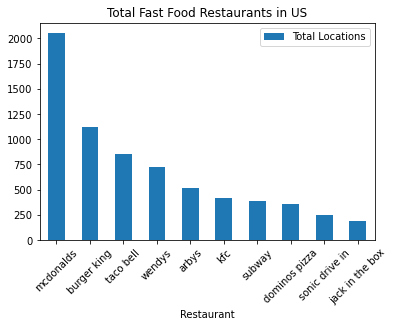

In [28]:
top_restaurant.set_index("Restaurant").plot(kind="bar", rot=45, title="Total Fast Food Restaurants in US")

plt.show()